![image](https://github.com/JoseGabriel-ITD/Probabilidad-y-Estadistica/blob/main/Cintilla2004.png?raw=true)

## **Curso de Inteligencia Artificial con Python y Scikit-Learn**
### Instructor: Dr. José Gabriel Rodríguez Rivas

<div style="color: blue;">
    <h1> Practica 6: Arboles de decisión</h1>
</div>

- Usar el criterio de Gini o Entropía (criterion='entropy') para medir la calidad de las divisiones.
- Controlar la complejidad del árbol ajustando parámetros como max_depth, min_samples_split y min_samples_leaf.

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [19]:
# Cargar el dataset
prestamos = pd.read_csv("prestamos.csv")
# Exploración rápida
prestamos.head()

,funded_amnt,loan_term_year,int_rate,grade_code,purpose_code,addr_state_code,home_ownership_code,annual_inc,dti,revol_util,pub_rec_bankruptcies,repaid,total_pymnt
0,2400,3,15.96,2,11,2,4,12252,8.72,98.5,0,1,3005.666844
1,10000,3,13.49,2,9,0,4,49200,20.00,21.0,0,1,12231.890000
2,3000,3,18.64,4,0,0,4,48000,5.35,87.5,0,1,3939.135294
3,5600,5,21.28,5,11,0,3,40000,5.55,32.6,0,0,647.500000
4,5375,5,12.69,1,9,5,4,15000,18.08,36.5,0,0,1484.590000


In [20]:
# columnas necesarias para entrenar el modelo de clasificacion, no ponemos la de pago y total pago
model_columns = ['funded_amnt', "int_rate", "grade_code", 'purpose_code', 'addr_state_code',
                 'home_ownership_code', 'annual_inc', 'dti', 'revol_util',
                 'pub_rec_bankruptcies']

# Dividimos el dataFrame en df_train y df_test.
df_train, df_test = train_test_split(prestamos, test_size=0.4, random_state=23)

#  No podemos usar df_train y df_test directamente en la clasificación, por lo tanto,
#  Definiremos X_train y X_test, manteniendo sólo las columnas del modelo.
X_train = df_train[model_columns]
X_test = df_test[model_columns]

#  A continuación, definimos y_train y y_test con la columna de **repaid**, es decir
#  la variable objetivo (Valor a predecir)
y_train = df_train.repaid
y_test = df_test.repaid

## Crear el modelo de árbol de clasificación



In [21]:
# 4. Crear el modelo de árbol de clasificación
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

In [22]:
# Entrenar el modelo
tree_model.fit(X_train, y_train)

# Precision del modelo en fase de entrenamiento
tree_model.score(X_train, y_train)

0.8541527126590757

In [23]:
# Hacer predicciones y calcular precision fase de prueba

y_pred = tree_model.predict(X_test)
tree_model.score(X_test, y_test)

0.8483174284279257

### Matriz de confusion

In [24]:
# Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

Matriz de Confusión:
[[   9 1177]
 [  31 6747]]


## Interpretacion matriz de confusion

- **True Negative (TN = 9)**. El modelo clasificó correctamente 9 casos como "No Pagados" cuando realmente eran "No Pagados".
- **False Positive (FP = 1177)**: 1177 casos fueron clasificados incorrectamente como "Pagados" cuando en realidad eran "No Pagados".
- **False Negative (FN = 31)**: 31 casos fueron clasificados incorrectamente como "No Pagados" cuando realmente eran "Pagados".
- **True Positive (TP = 6747)**: El modelo clasificó correctamente 6747 casos como "Pagados" cuando realmente eran "Pagados.  
 #### Por lo tanto:
- El modelo tiene un desempeño deficiente para la clase minoritaria (No Pagado), con un número muy bajo de True Negatives (TN = 9).
- Además, comete un gran número de errores clasificando créditos "No Pagados" como "Pagados" (False Positives = 1177).

### Reporte de clasificacion

In [25]:
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.23      0.01      0.01      1186
           1       0.85      1.00      0.92      6778

    accuracy                           0.85      7964
   macro avg       0.54      0.50      0.47      7964
weighted avg       0.76      0.85      0.78      7964



## Interpretacion Reporte de clasificacion

- El 85% de las predicciones totales son correctas.
- Aunque parece un buen resultado, puede ser engañoso debido al **desbalance de clases**.
- La mayoría de los casos son de la clase mayoritaria (Pagado), lo que favorece esta métrica.
- El modelo **identifica correctamente solo el 1% de los casos realmente "No Pagado"**.
- El modelo tiene un desempeño muy deficiente en detectar la clase "No Pagado".
- El 85% de las instancias clasificadas como "Pagado" son correctas. Esto sugiere que la mayoría de los casos predichos como "Pagado" realmente lo son.

#### Impacto en la Toma de Decisiones:
- La incapacidad del modelo para identificar casos "No Pagado" puede tener consecuencias graves, ya que podría predecir erróneamente que un crédito riesgoso será pagado.

## Visualización del Árbol

- Para interpretar mejor el modelo, se graficará el árbol

|--- int_rate <= 13.83
|   |--- int_rate <= 8.43
|   |   |--- annual_inc <= 58148.00
|   |   |   |--- annual_inc <= 13600.00
|   |   |   |   |--- funded_amnt <= 7350.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- funded_amnt >  7350.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- annual_inc >  13600.00
|   |   |   |   |--- revol_util <= 53.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- revol_util >  53.45
|   |   |   |   |   |--- class: 1
|   |   |--- annual_inc >  58148.00
|   |   |   |--- purpose_code <= 8.50
|   |   |   |   |--- funded_amnt <= 24500.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- funded_amnt >  24500.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- purpose_code >  8.50
|   |   |   |   |--- revol_util <= 39.40
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- revol_util >  39.40
|   |   |   |   |   |--- class: 1
|   |--- int_rate >  8.43
|   |   |--- annual_inc <= 44406.00
|   |   |   |--- annual_inc <= 10900.00
|   |  

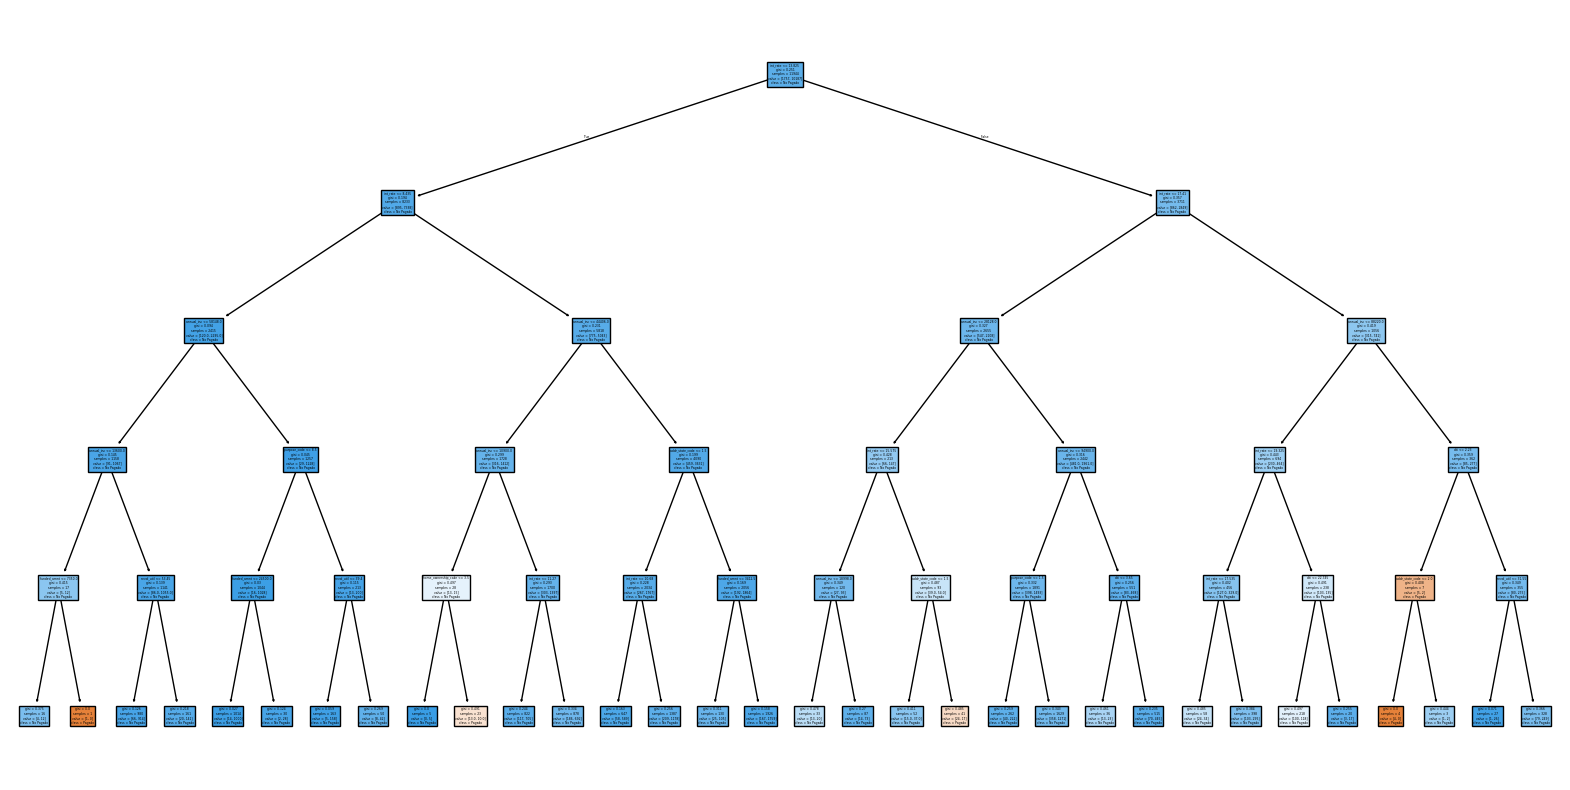

In [26]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

# Visualizar el árbol en texto
print(export_text(tree_model, feature_names=model_columns))

# Graficar el árbol
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=model_columns, class_names=['Pagado', 'No Pagado'], filled=True)
plt.show()

## Interpretacion arbol

- **int_rate < 13.825):** Esta es la primera condición evaluada por el árbol. Se eligió este valor porque es el umbral que mejor separa las dos clases (Pagado y No Pagado) en términos de pureza, utilizando la métrica de Gini.
- **gini = 0.251** Indica que el nodo no está completamente puro, pero una de las clases es dominante: Clase Mayoritaria: "Pagado", ya que tiene 10,187 ejemplos frente a 1757 ejemplos de la clase "No Pagado".
- **samples = 11944:**  Este valor muestra que el nodo raíz contiene todos los ejemplos del dataset. En cada división posterior, este número se reducirá a medida que los datos se distribuyen en las ramas izquierda y derecha.
- **Distribución de Clases (value = [1757, 10187]):** 1757 de los datos pertenecen a la clase "No Pagado". y el resto pertenece a la clase "Pagado".

### RAMA IZQUIERDA
- **int_rate < 8.435**: Representa un subgrupo de préstamos con tasas de interés menores a 8.435%
- **gini = 0.194**: Indica que este nodo es más puro que el nodo raíz. Significa que la mayoría de las instancias en este nodo pertenecen a una sola clase.
- **Samples = 8233**: Contiene 8233 instancias de las 11,944 originales.
- **value = [895, 7338]**: 895 casos corresponden a la clase "No Pagado". 7338 casos corresponden a la clase "Pagado".
- **class = no pagado**: A pesar de que la clase mayoritaria es "Pagado" en términos de cantidad, este nodo predice "No Pagado" como clase predominante. Esto podría deberse a:
    - Ajustes en los pesos de clase (class_weight='balanced').
    - Algoritmo del árbol que prioriza las condiciones para identificar mejor la clase minoritaria.

### RAMA DERECHA
- **int_rate <= 17.41**: Representa préstamos con tasas de interés entre 13.825% y 17.41%
- **gini = 0.357**: Este nodo es menos puro (Gini=0.357) que el nodo de la rama izquierda:
- **samples = 3711**: Contiene 3711 instancias de las 11,944 originales. Estos datos no cumplen con la condición de la rama izquierda (int_rate < 13.825) y fueron clasificados en esta rama derecha.
- **value = [862, 2849]**: 862 casos corresponden a la clase "No Pagado". y 2849 casos corresponden a la clase "Pagado".
- **Class = no pagado**: Similar al nodo izquierdo, este nodo también predice la clase "No Pagado" como predominante, a pesar de que la clase "Pagado" tiene más instancias. Esto podría estar relacionado con los ajustes de pesos o la optimización del árbol para identificar mejor la clase minoritaria.

## Exportar árbol a imágen

- Instalar librería graphviz

In [27]:
import graphviz
from sklearn import tree
# API REFERENCE   graphviz
# https://graphviz.readthedocs.io/en/stable/api.html#graph

dot_data = tree.export_graphviz(tree_model, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("arbolito",format="png")

'arbolito.png'

### Mejorar la presentacion de la imagen

- Agregamos etiquetas de variables
- Agregamos nombres de las clases

In [28]:
target_names = ['No Pagado', 'Pagado']
dot_data = tree.export_graphviz(tree_model, out_file=None, feature_names=model_columns,
                                class_names=target_names, filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("arbolitoCOLOR",format="png")

'arbolitoCOLOR.png'

## Cargar una imagen

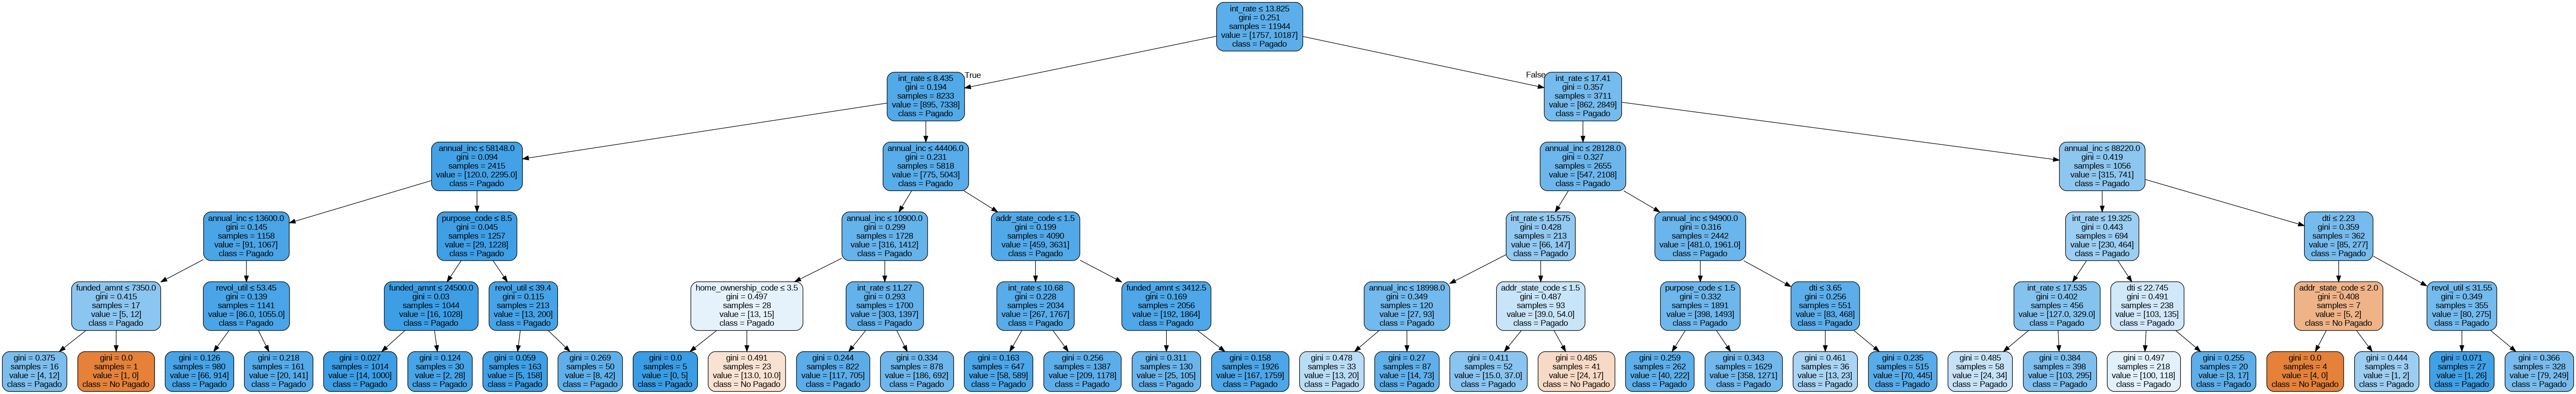

In [29]:
from IPython.display import Image

fig = Image(filename=('arbolitoCOLOR.png'))
fig

### Visualizar la importancia de las características

In [30]:
# Visualizar la importancia de las características

feature_importances = pd.DataFrame({
    'Feature': model_columns,
    'Importance': tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nImportancia de las características:")
print(feature_importances)


Importancia de las características:
                Feature  Importance
1              int_rate    0.662458
6            annual_inc    0.180390
7                   dti    0.049612
4       addr_state_code    0.041399
8            revol_util    0.020685
0           funded_amnt    0.019178
3          purpose_code    0.013497
5   home_ownership_code    0.012781
2            grade_code    0.000000
9  pub_rec_bankruptcies    0.000000


##   Balanceo de clases

In [31]:
# balanceo de clases
tree_model2 = DecisionTreeClassifier(criterion='gini', max_depth=5, class_weight='balanced', random_state=42, )

# Entrenar el modelo
tree_model2.fit(X_train, y_train)

# Precision del modelo en fase de entrenamiento
print("Precision entrenamiento", tree_model2.score(X_train, y_train) )

# Hacer predicciones y calcular precision fase de prueba
y_pred = tree_model2.predict(X_test)
print("Precision entrenamiento", tree_model2.score(X_test, y_test ) )

# Evaluar el modelo

print("\n Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

Precision entrenamiento 0.6428332217012726
Precision entrenamiento 0.630462079357107

 Matriz de Confusión:
[[ 684  502]
 [2441 4337]]


In [36]:
# Visualizar la importancia de las características

feature_importances = pd.DataFrame({
    'Feature': model_columns,
    'Importance': tree_model2.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nImportancia de las características:")
print(feature_importances)


Importancia de las características:
                Feature  Importance
1              int_rate    0.333642
2            grade_code    0.282384
4       addr_state_code    0.102911
6            annual_inc    0.067832
8            revol_util    0.065216
3          purpose_code    0.054623
0           funded_amnt    0.039871
7                   dti    0.024744
5   home_ownership_code    0.015549
9  pub_rec_bankruptcies    0.013229


In [37]:
# balanceo de clases
tree_model3 = DecisionTreeClassifier(criterion='gini', max_depth=3, class_weight='balanced', random_state=42, )

# Entrenar el modelo
tree_model3.fit(X_train, y_train)

# Precision del modelo en fase de entrenamiento
print("Precision entrenamiento", tree_model3.score(X_train, y_train) )

# Hacer predicciones y calcular precision fase de prueba
y_pred = tree_model3.predict(X_test)
print("Precision entrenamiento", tree_model3.score(X_test, y_test ) )

# Evaluar el modelo

print("\n Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

Precision entrenamiento 0.6297722705961152
Precision entrenamiento 0.6295831240582622

 Matriz de Confusión:
[[ 694  492]
 [2458 4320]]


In [38]:
# Visualizar la importancia de las características

feature_importances = pd.DataFrame({
    'Feature': model_columns,
    'Importance': tree_model3.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nImportancia de las características:")
print(feature_importances)


Importancia de las características:
                Feature  Importance
1              int_rate    0.837488
6            annual_inc    0.162512
0           funded_amnt    0.000000
2            grade_code    0.000000
3          purpose_code    0.000000
4       addr_state_code    0.000000
5   home_ownership_code    0.000000
7                   dti    0.000000
8            revol_util    0.000000
9  pub_rec_bankruptcies    0.000000


###  Modificar parametros de entrenamiento

- Criterio = entropy. Usa la entropía (log base 2) para calcular la ganancia de información. en lugar del indice Gini.
- splitter: " posibles opciones:
    - 'best' (por defecto): Encuentra la mejor división posible.
    - 'random': Divide de forma aleatoria entre las divisiones más prometedoras.

In [39]:
tree_model4 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=3,
                                     class_weight='balanced', random_state=42, )
# Entrenar el modelo
tree_model4.fit(X_train, y_train)

# Precision del modelo en fase de entrenamiento
print("Precision entrenamiento", tree_model4.score(X_train, y_train) )
# Hacer predicciones y calcular precision fase de prueba
y_pred = tree_model4.predict(X_test)
print("Precision datos de prueba", tree_model4.score(X_test, y_test ) )
# Evaluar el modelo
print("\n Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

Precision entrenamiento 0.5930174146014735
Precision datos de prueba 0.5818684078352586

 Matriz de Confusión:
[[ 735  451]
 [2879 3899]]


In [40]:
# balanceo de clases
tree_model5 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=7, class_weight='balanced',
                                     random_state=42, )

# Entrenar el modelo
tree_model5.fit(X_train, y_train)
# Precision del modelo en fase de entrenamiento
print("Precision entrenamiento", tree_model5.score(X_train, y_train) )
# Hacer predicciones y calcular precision fase de prueba
y_pred = tree_model5.predict(X_test)
print("Precision prueba", tree_model2.score(X_test, y_test ) )
# Evaluar el modelo
print("\n Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

Precision entrenamiento 0.5892498325519089
Precision prueba 0.5699397287795078

 Matriz de Confusión:
[[ 745  441]
 [2984 3794]]
